In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization aesthetics
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')


In [2]:
# Step 2: Load the cleaned dataset
df_apps = pd.read_csv('../data/cleaned_googleplaystore.csv')  # or path to your cleaned CSV
df_apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Step 3: Basic overview of the data
df_apps.info()
df_apps.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   float64
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   float64
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(4), object(9)
memory usage: 903.2+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8892,8892,8892.000000,8.892000e+03,8892,8.892000e+03,8892,8892.0,8892,8892,8892,8888,8890
unique,8196,33,NaN,NaN,414,NaN,2,NaN,6,115,1300,2638,31
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1718,NaN,NaN,1468,NaN,8279,NaN,7095,733,291,1258,1987
mean,NaN,NaN,4.187877,4.727764e+05,NaN,1.648965e+07,NaN,0.0,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.522377,2.905052e+06,NaN,8.637600e+07,NaN,0.0,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000e+00,NaN,1.000000e+00,NaN,0.0,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,1.640000e+02,NaN,1.000000e+04,NaN,0.0,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,4.714500e+03,NaN,5.000000e+05,NaN,0.0,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,7.126675e+04,NaN,5.000000e+06,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Step 4: Check missing values
missing_values = df_apps.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])


Current Ver    4
Android Ver    2
dtype: int64


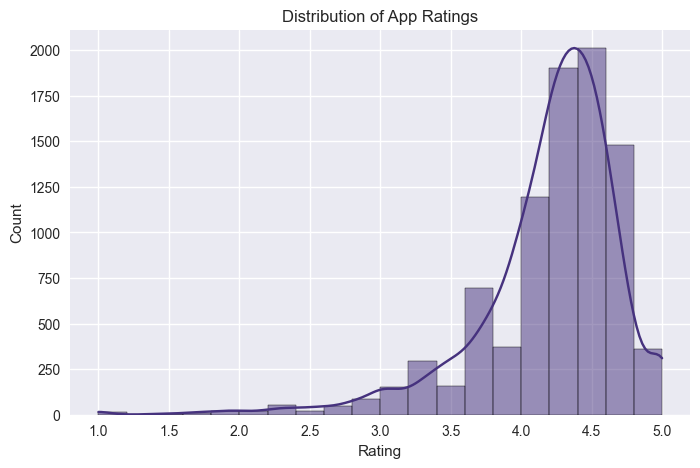

In [5]:
# Step 5: Distribution of app ratings
plt.figure(figsize=(8,5))
sns.histplot(df_apps['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


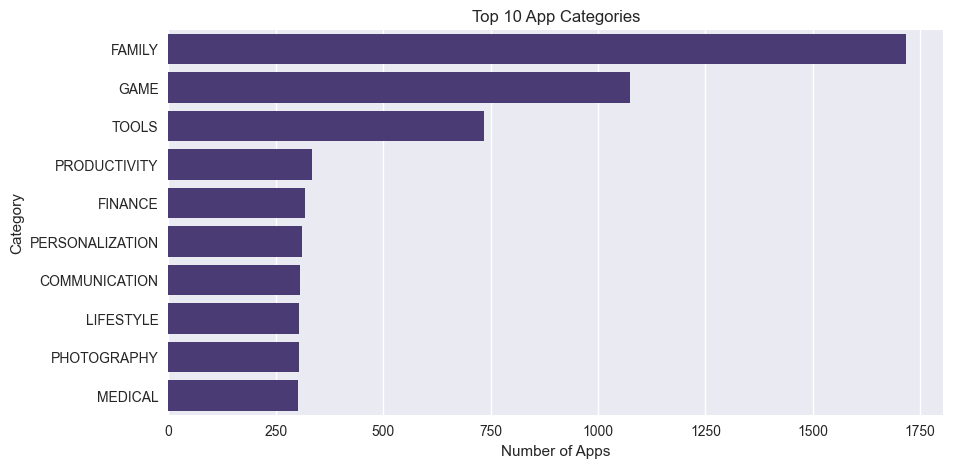

In [6]:
# Step 6: Count of apps by category
top_categories = df_apps['Category'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


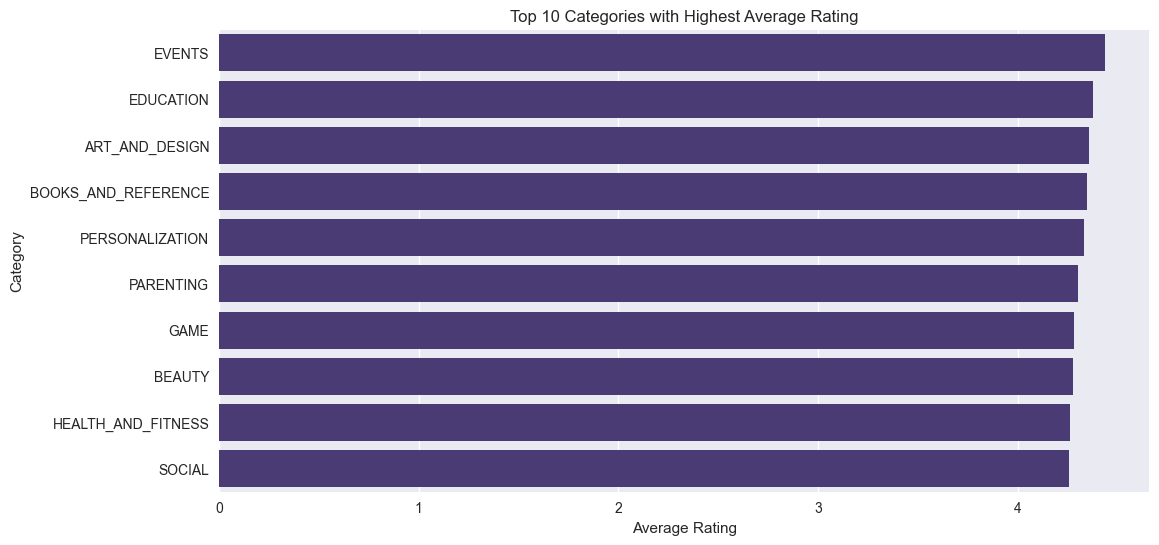

In [7]:
# Step 7: Average rating per category
plt.figure(figsize=(12,6))
avg_rating_cat = df_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_cat.values, y=avg_rating_cat.index)
plt.title('Top 10 Categories with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


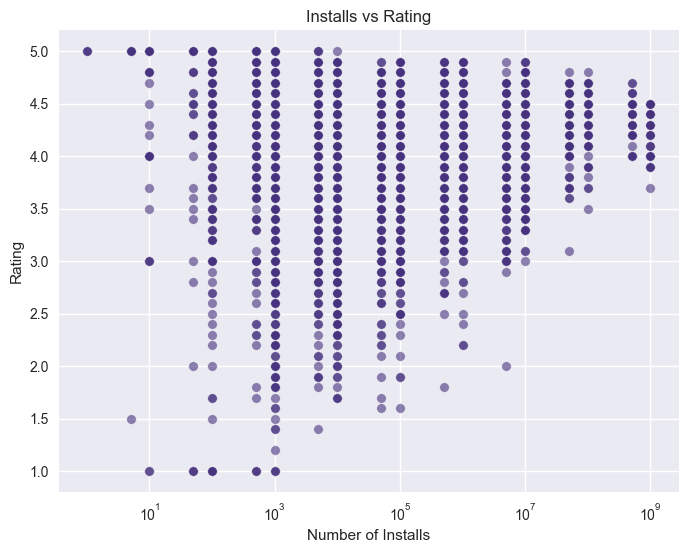

In [8]:
# Step 8: Relationship between installs and ratings
plt.figure(figsize=(8,6))
sns.scatterplot(x='Installs', y='Rating', data=df_apps, alpha=0.6)
plt.title('Installs vs Rating')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.xscale('log')  # log scale since installs vary greatly
plt.show()


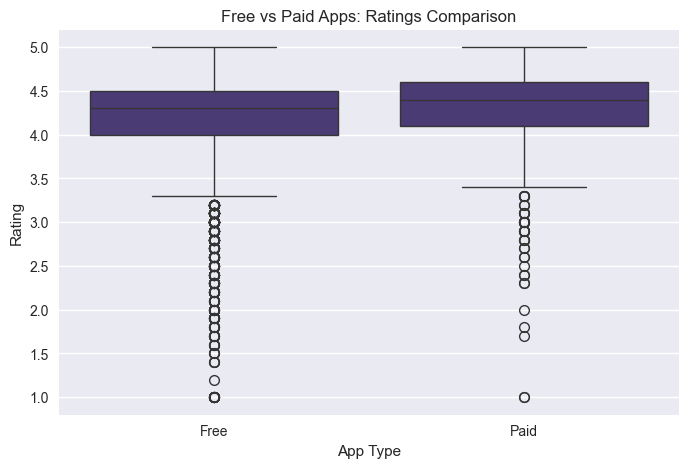

In [9]:
# Step 9: Free vs Paid apps and their ratings
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=df_apps)
plt.title('Free vs Paid Apps: Ratings Comparison')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()


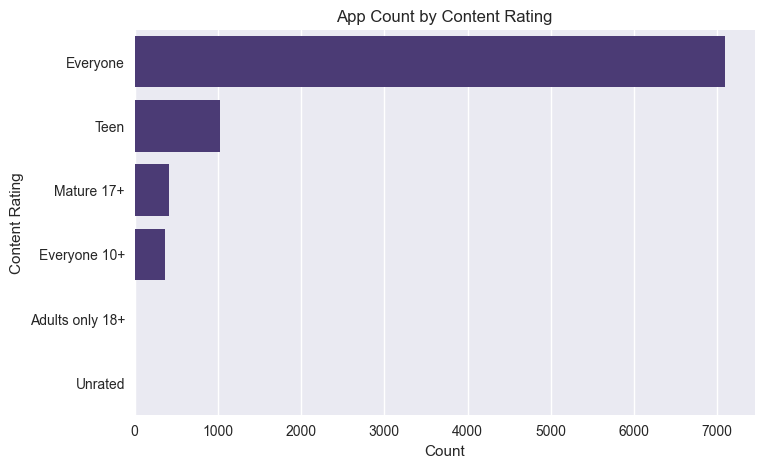

In [10]:
# Step 10: Apps by content rating
plt.figure(figsize=(8,5))
sns.countplot(y='Content Rating', data=df_apps, order=df_apps['Content Rating'].value_counts().index)
plt.title('App Count by Content Rating')
plt.xlabel('Count')
plt.ylabel('Content Rating')
plt.show()


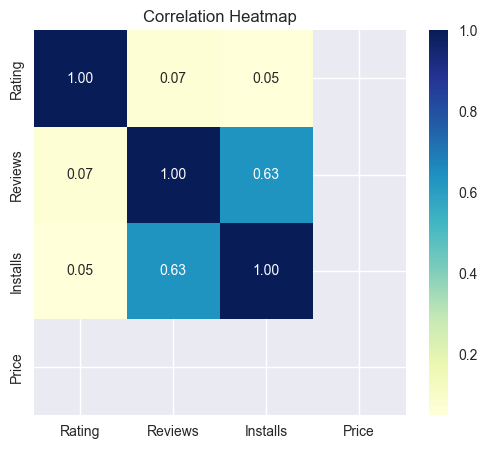

In [11]:
# Step 11: Correlation heatmap for numeric columns
plt.figure(figsize=(6,5))
sns.heatmap(df_apps.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
